In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import math as m

## Завдання 2. 
Задати куб через його вершини. Здійснити масштабування куба (збільшення,зменшення у кілька разів). Записати відповідну матрицю.

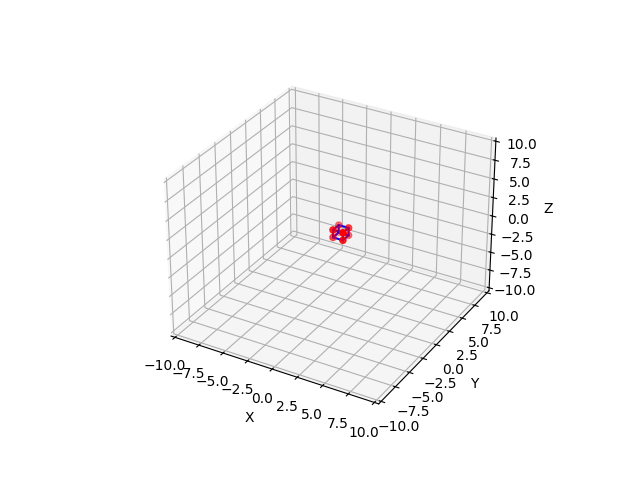

In [2]:
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],
    [4, 5], [5, 6], [6, 7], [7, 4],
    [0, 4], [1, 5], [2, 6], [3, 7]
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color='r')

for edge in edges:
    ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

plt.show()


In [3]:
M_scaling_x3 = np.array([[3, 0, 0, 0],
                [0, 3, 0, 0],
                [0, 0, 3, 0],
                [0, 0, 0, 1]])
vertices = np.stack((vertices[:, 0],vertices[:, 1], vertices[:, 2], np.ones(len(vertices))))
scaled_vertices = vertices.T.dot(M_scaling_x3)

(-10.0, 10.0)

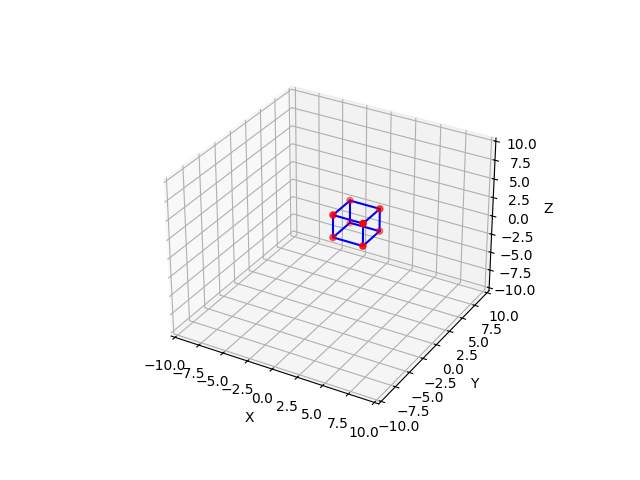

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_vertices[:,0], scaled_vertices[:,1], scaled_vertices[:,2], color='r')

for edge in edges:
    ax.plot([scaled_vertices[edge[0]][0], scaled_vertices[edge[1]][0]],
            [scaled_vertices[edge[0]][1], scaled_vertices[edge[1]][1]],
            [scaled_vertices[edge[0]][2], scaled_vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

In [5]:
M_scaling_x03 = np.array([[0.3, 0, 0, 0],
                [0, 0.3, 0, 0],
                [0, 0, 0.3, 0],
                [0, 0, 0, 1]])

under_scaled_vertices = vertices.T.dot(M_scaling_x03)

(-10.0, 10.0)

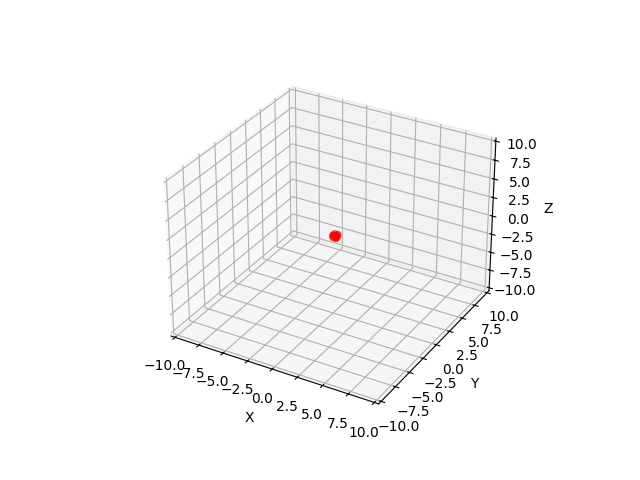

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(under_scaled_vertices[:,0], under_scaled_vertices[:,1], under_scaled_vertices[:,2], color='r')

for edge in edges:
    ax.plot([under_scaled_vertices[edge[0]][0], under_scaled_vertices[edge[1]][0]],
            [under_scaled_vertices[edge[0]][1], under_scaled_vertices[edge[1]][1]],
            [under_scaled_vertices[edge[0]][2], under_scaled_vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)


# Завдання 3. 
Отриманий результат з попереднього пункту симетрично відобразити відносно початку координат, відносно однієї з координатних площин у тривимірній декартовій системі координат (простір).

In [7]:
M_reflexion_xyz = np.array([[-1, 0, 0, 0],
                [0, -1, 0, 0],
                [0, 0, -1, 0],
                [0, 0, 0, 1]])


reflected_scaled_vertices = scaled_vertices.dot(M_reflexion_xyz)

(-10.0, 10.0)

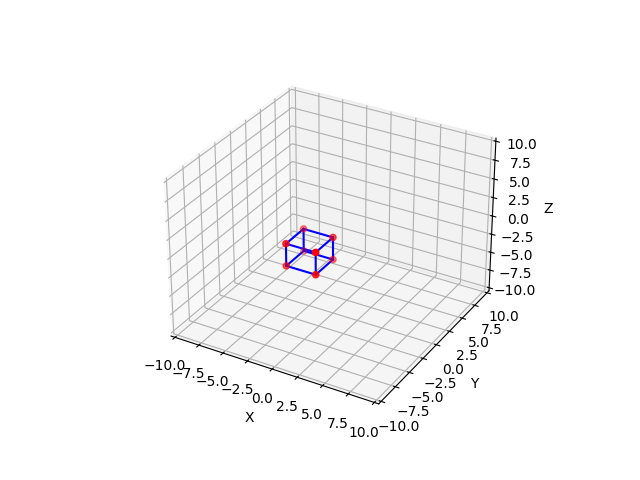

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reflected_scaled_vertices[:,0], reflected_scaled_vertices[:,1], reflected_scaled_vertices[:,2], color='r')

for edge in edges:
    ax.plot([reflected_scaled_vertices[edge[0]][0], reflected_scaled_vertices[edge[1]][0]],
            [reflected_scaled_vertices[edge[0]][1], reflected_scaled_vertices[edge[1]][1]],
            [reflected_scaled_vertices[edge[0]][2], reflected_scaled_vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)


In [9]:
M_reflexion_xy = np.array([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, -1, 0],
                [0, 0, 0, 1]])


reflected_xy_scaled_vertices = scaled_vertices.dot(M_reflexion_xy)

(-10.0, 10.0)

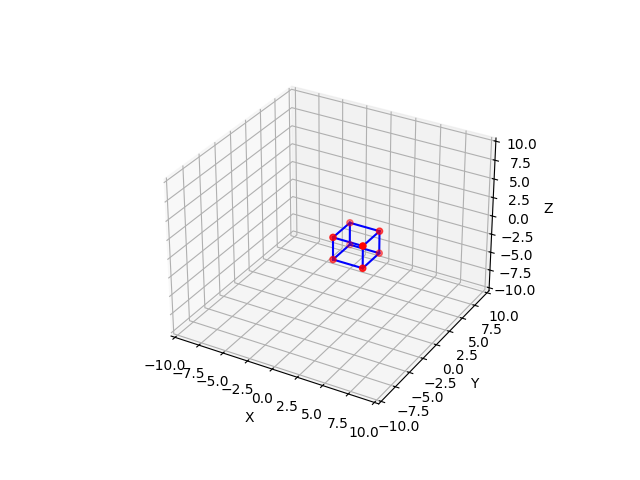

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reflected_xy_scaled_vertices[:,0], reflected_xy_scaled_vertices[:,1], reflected_xy_scaled_vertices[:,2], color='r')

for edge in edges:
    ax.plot([reflected_xy_scaled_vertices[edge[0]][0], reflected_xy_scaled_vertices[edge[1]][0]],
            [reflected_xy_scaled_vertices[edge[0]][1], reflected_xy_scaled_vertices[edge[1]][1]],
            [reflected_xy_scaled_vertices[edge[0]][2], reflected_xy_scaled_vertices[edge[1]][2]], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)


# Завдання 4.
Задати пряму як у прикладі 1 даної лабораторної роботи. Здійснити поворот куба відносно прямої на деякий кут φ. Вказати перетворення, які необхідні для одержання такого результату.

In [15]:
vertices = np.array([
    [5, 5, 5, 1],
    [7, 5, 5, 1],
    [7, 7, 5, 1],
    [5, 7, 5, 1],
    [5, 5, 7, 1],
    [7, 5, 7, 1],
    [7, 7, 7, 1],
    [5, 7, 7, 1]
])

x_start, x_end = 0, np.random.uniform(0, 10, 1);print(x_start);print(x_end)
y_start, y_end = 0, np.random.uniform(0, 10, 1);print(y_start);print(y_end)
z_start, z_end = 0, np.random.uniform(0, 10, 1);print(z_start);print(z_end)

# xs = np.linspace(x_start, x_end, 100)
# ys = np.linspace(y_start, y_end, 100)
# zs = np.linspace(z_start, z_end, 100)

line_vector = np.array((x_end[0]-x_start, y_end[0]-y_start, z_end[0]-z_start, 1))
# line = np.array([[x_start, y_start, z_start, 1],[x_end, y_end, z_end, 1]])
line = np.array([[0, 0, 0, 1],[x_end[0], y_end[0], z_end[0], 1]])
# print(line)

0
[4.12639334]
0
[6.37343048]
0
[0.53073632]


In [16]:
row_sums = np.sum(vertices, axis=1)
min_row_index = np.argmin(row_sums)
min_row = vertices[min_row_index]

M_transpose_to_0 = np.array([[1, 0, 0, -min_row[0]],
                            [0, 1, 0, -min_row[1]],
                            [0, 0, 1, -min_row[2]],
                            [0, 0, 0, 1]])

cosxi = line_vector[2]/m.sqrt(line_vector[1]**2+line_vector[2]**2)
sinxi = line_vector[1]/m.sqrt(line_vector[1]**2+line_vector[2]**2)

R_x = np.array([[1,     0,    0,   0],
                [0, cosxi, -sinxi,  0],
                [0, sinxi, cosxi, 0],
                [0,     0,      0, 1]])

print(line_vector)
l_m_vector = line_vector.dot(R_x.T)
print(l_m_vector)
l_m_vector = l_m_vector/m.sqrt(l_m_vector[0]**2 + l_m_vector[2]**2); l_m_vector[3] = 1
print(l_m_vector)

costeta = l_m_vector[2]
sinteta = l_m_vector[0]
R_y = np.array([[costeta, 0, -sinteta, 0],
                [0,       1,        0, 0],
                [sinteta, 0,  costeta, 0],
                [0,       0,        0, 1]])

#rotate by φ=pi/3
fi = m.pi/3
cosfi = m.cos(fi)
sinfi = m.sin(fi)

R_z = np.array([[cosfi, -sinfi,  0, 0],
                [sinfi, cosfi, 0, 0],    
                [0,         0,  1, 0],
                [0,         0,  0, 1]])

R_y_back = np.array([[costeta, 0, sinteta, 0],
                [0,       1,        0, 0],
                [-sinteta, 0,  costeta, 0],
                [0,       0,        0, 1]]) 

R_x_back = np.array([[1, 0, 0, 0],
                [0, cosxi, -sinxi, 0],
                [0, sinxi, cosxi, 0],
                [0,     0,     0, 1]])



[4.12639334 6.37343048 0.53073632 1.        ]
[4.12639334 0.         6.39549037 1.        ]
[0.54215197 0.         0.84028046 1.        ]


In [17]:
m_vertices = vertices.dot(M_transpose_to_0.T)

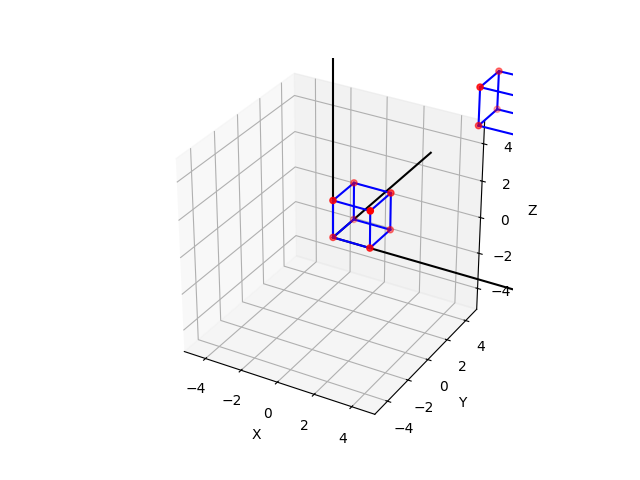

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color='r')

for edge in edges:
    ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]], color='b')
    


#plot cube
ax.scatter(m_vertices[:,0], m_vertices[:,1], m_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_vertices[edge[0]][0], m_vertices[edge[1]][0]],
            [m_vertices[edge[0]][1], m_vertices[edge[1]][1]],
            [m_vertices[edge[0]][2], m_vertices[edge[1]][2]], color='b')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")



plt.show()

In [19]:
m_rx_vertices = m_vertices.dot(R_x)

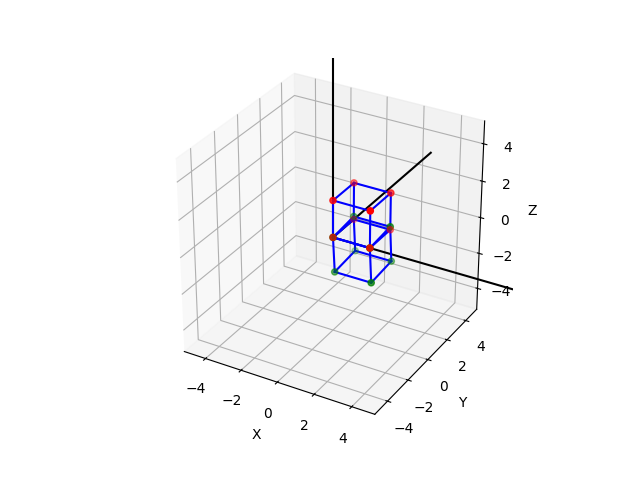

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_vertices[:,0], m_vertices[:,1], m_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_vertices[edge[0]][0], m_vertices[edge[1]][0]],
            [m_vertices[edge[0]][1], m_vertices[edge[1]][1]],
            [m_vertices[edge[0]][2], m_vertices[edge[1]][2]], color='b')
    


#plot cube
ax.scatter(m_rx_vertices[:,0], m_rx_vertices[:,1], m_rx_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rx_vertices[edge[0]][0], m_rx_vertices[edge[1]][0]],
            [m_rx_vertices[edge[0]][1], m_rx_vertices[edge[1]][1]],
            [m_rx_vertices[edge[0]][2], m_rx_vertices[edge[1]][2]], color='b')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

In [21]:
m_rxy_vertices = m_rx_vertices.dot(R_y)

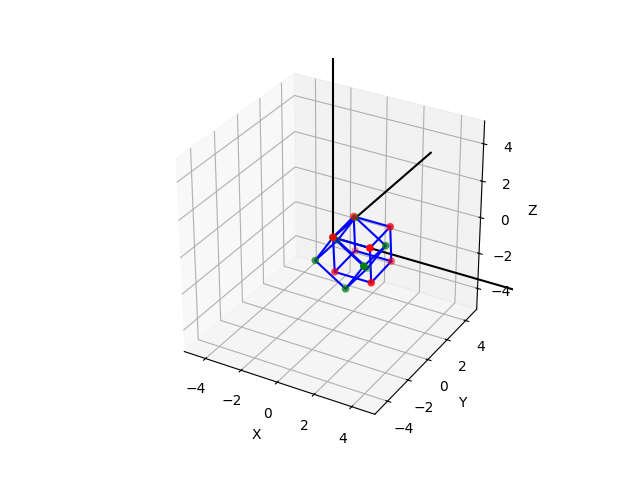

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rx_vertices[:,0], m_rx_vertices[:,1], m_rx_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rx_vertices[edge[0]][0], m_rx_vertices[edge[1]][0]],
            [m_rx_vertices[edge[0]][1], m_rx_vertices[edge[1]][1]],
            [m_rx_vertices[edge[0]][2], m_rx_vertices[edge[1]][2]], color='b')
    

#plot cube
ax.scatter(m_rxy_vertices[:,0], m_rxy_vertices[:,1], m_rxy_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxy_vertices[edge[0]][0], m_rxy_vertices[edge[1]][0]],
            [m_rxy_vertices[edge[0]][1], m_rxy_vertices[edge[1]][1]],
            [m_rxy_vertices[edge[0]][2], m_rxy_vertices[edge[1]][2]], color='b')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

In [23]:
m_rxyz_vertices = m_rxy_vertices.dot(R_z)

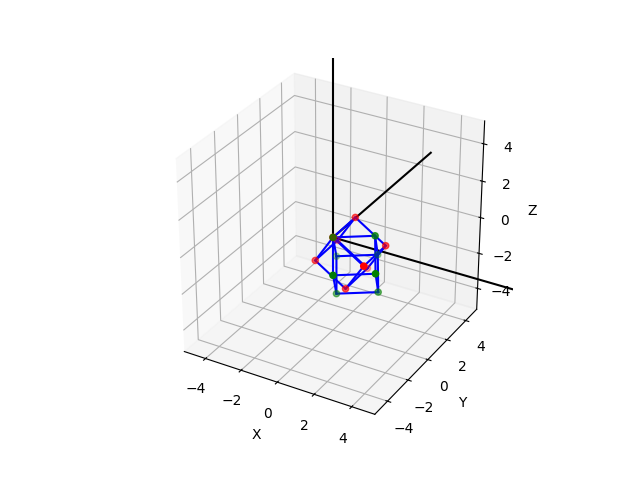

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rxy_vertices[:,0], m_rxy_vertices[:,1], m_rxy_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rxy_vertices[edge[0]][0], m_rxy_vertices[edge[1]][0]],
            [m_rxy_vertices[edge[0]][1], m_rxy_vertices[edge[1]][1]],
            [m_rxy_vertices[edge[0]][2], m_rxy_vertices[edge[1]][2]], color='b')
    
#plot cube
ax.scatter(m_rxyz_vertices[:,0], m_rxyz_vertices[:,1], m_rxyz_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyz_vertices[edge[0]][0], m_rxyz_vertices[edge[1]][0]],
            [m_rxyz_vertices[edge[0]][1], m_rxyz_vertices[edge[1]][1]],
            [m_rxyz_vertices[edge[0]][2], m_rxyz_vertices[edge[1]][2]], color='b')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

In [25]:
m_rxyzdy_vertices = m_rxyz_vertices.dot(R_y.T)

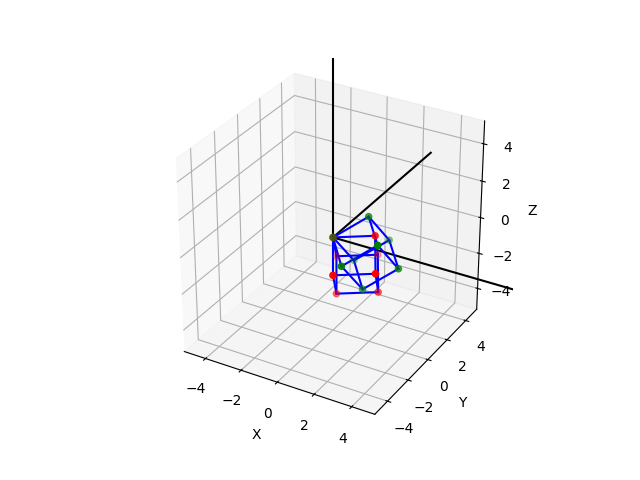

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rxyz_vertices[:,0], m_rxyz_vertices[:,1], m_rxyz_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rxyz_vertices[edge[0]][0], m_rxyz_vertices[edge[1]][0]],
            [m_rxyz_vertices[edge[0]][1], m_rxyz_vertices[edge[1]][1]],
            [m_rxyz_vertices[edge[0]][2], m_rxyz_vertices[edge[1]][2]], color='b')
   
#plot cube
ax.scatter(m_rxyzdy_vertices[:,0], m_rxyzdy_vertices[:,1], m_rxyzdy_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyzdy_vertices[edge[0]][0], m_rxyzdy_vertices[edge[1]][0]],
            [m_rxyzdy_vertices[edge[0]][1], m_rxyzdy_vertices[edge[1]][1]],
            [m_rxyzdy_vertices[edge[0]][2], m_rxyzdy_vertices[edge[1]][2]], color='b')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

In [27]:
m_rxyzdydx_vertices = m_rxyzdy_vertices.dot(R_x.T)

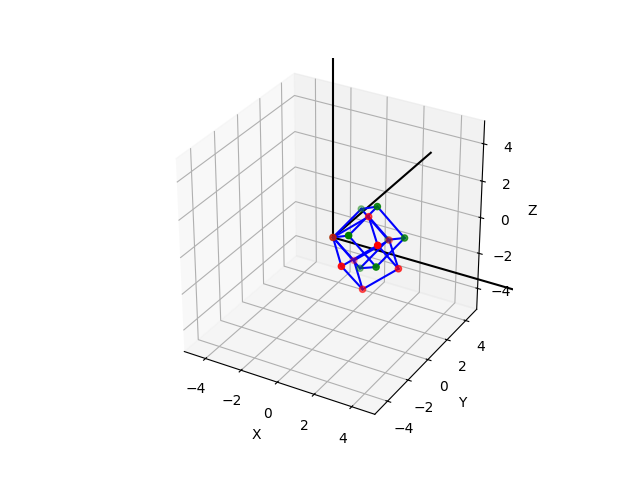

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rxyzdy_vertices[:,0], m_rxyzdy_vertices[:,1], m_rxyzdy_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rxyzdy_vertices[edge[0]][0], m_rxyzdy_vertices[edge[1]][0]],
            [m_rxyzdy_vertices[edge[0]][1], m_rxyzdy_vertices[edge[1]][1]],
            [m_rxyzdy_vertices[edge[0]][2], m_rxyzdy_vertices[edge[1]][2]], color='b')
 
#plot cube
ax.scatter(m_rxyzdydx_vertices[:,0], m_rxyzdydx_vertices[:,1], m_rxyzdydx_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyzdydx_vertices[edge[0]][0], m_rxyzdydx_vertices[edge[1]][0]],
            [m_rxyzdydx_vertices[edge[0]][1], m_rxyzdydx_vertices[edge[1]][1]],
            [m_rxyzdydx_vertices[edge[0]][2], m_rxyzdydx_vertices[edge[1]][2]], color='b')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

In [29]:
m_rxyzdydx_dm_vertices = m_rxyzdydx_vertices.dot(-M_transpose_to_0.T)

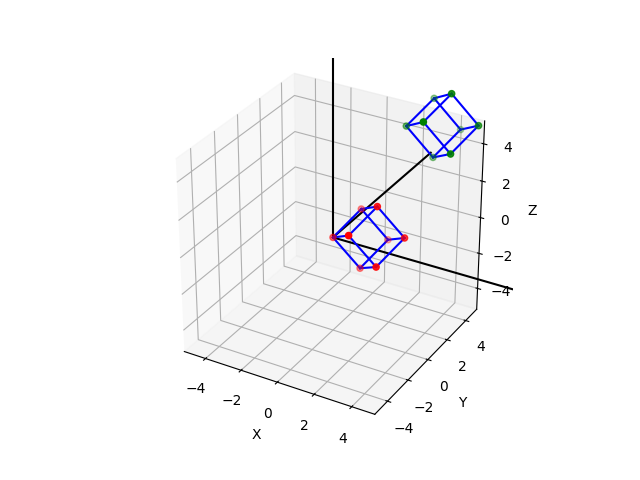

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(m_rxyzdydx_vertices[:,0], m_rxyzdydx_vertices[:,1], m_rxyzdydx_vertices[:,2], color='r')

for edge in edges:
    ax.plot([m_rxyzdydx_vertices[edge[0]][0], m_rxyzdydx_vertices[edge[1]][0]],
            [m_rxyzdydx_vertices[edge[0]][1], m_rxyzdydx_vertices[edge[1]][1]],
            [m_rxyzdydx_vertices[edge[0]][2], m_rxyzdydx_vertices[edge[1]][2]], color='b')
    
#plot cube
ax.scatter(m_rxyzdydx_dm_vertices[:,0], m_rxyzdydx_dm_vertices[:,1], m_rxyzdydx_dm_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyzdydx_dm_vertices[edge[0]][0], m_rxyzdydx_dm_vertices[edge[1]][0]],
            [m_rxyzdydx_dm_vertices[edge[0]][1], m_rxyzdydx_dm_vertices[edge[1]][1]],
            [m_rxyzdydx_dm_vertices[edge[0]][2], m_rxyzdydx_dm_vertices[edge[1]][2]], color='b')
    

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

## Result

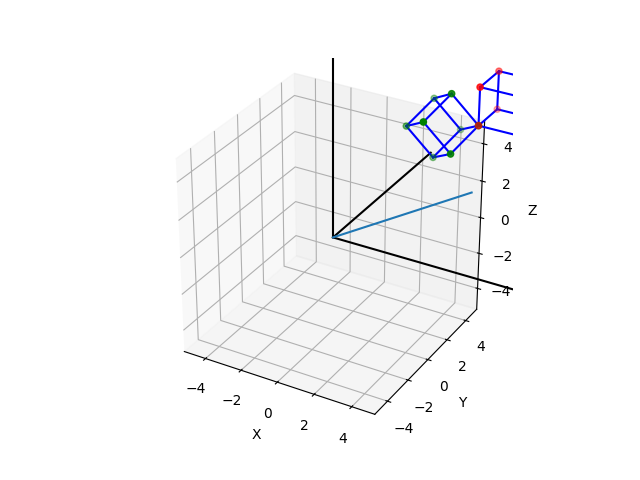

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


#plot lines
ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

#plot cube
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color='r')

for edge in edges:
    ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]], color='b')
    
#plot cube
ax.scatter(m_rxyzdydx_dm_vertices[:,0], m_rxyzdydx_dm_vertices[:,1], m_rxyzdydx_dm_vertices[:,2], color='g')

for edge in edges:
    ax.plot([m_rxyzdydx_dm_vertices[edge[0]][0], m_rxyzdydx_dm_vertices[edge[1]][0]],
            [m_rxyzdydx_dm_vertices[edge[0]][1], m_rxyzdydx_dm_vertices[edge[1]][1]],
            [m_rxyzdydx_dm_vertices[edge[0]][2], m_rxyzdydx_dm_vertices[edge[1]][2]], color='b')

#plot init line
ax.plot(line[:,0], line[:,1], line[:,2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)
plt.gca().set_aspect("equal")


plt.show()

In [32]:
# result_rotation = (vertices).dot(M_transpose_to_0.T).dot(R_x).dot(R_y).dot(R_z).dot(M_transpose_from_0.T)

In [33]:
# fig = plt.figure()
# # ax = fig.add_subplot(111, projection='3d')


# #plot lines
# ax.plot(line[:,0], line[:,1], line[:,2])
# ax.plot(line.dot(M_transpose_to_0.T).dot(R_x)[:,0], line.dot(M_transpose_to_0.T).dot(R_x)[:,1], line.dot(M_transpose_to_0.T).dot(R_x)[:,2])
# ax.plot(line.dot(M_transpose_to_0).dot(R_x).dot(R_y)[:,0], line.dot(M_transpose_to_0).dot(R_x).dot(R_y)[:,1], line.dot(M_transpose_to_0).dot(R_x).dot(R_y)[:,2])
# ax.plot([0, 10], [0, 0], [0, 0], color='black')  # x-axis
# ax.plot([0, 0], [0, 10], [0, 0], color='black')  # y-axis
# ax.plot([0, 0], [0, 0], [0, 10], color='black')  # z-axis

# #plot cube
# ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color='r')

# for edge in edges:
#     ax.plot([vertices[edge[0]][0], vertices[edge[1]][0]],
#             [vertices[edge[0]][1], vertices[edge[1]][1]],
#             [vertices[edge[0]][2], vertices[edge[1]][2]], color='b')
    


# #plot cube
# ax.scatter(result_rotation[:,0], result_rotation[:,1], result_rotation[:,2], color='r')

# for edge in edges:
#     ax.plot([result_rotation[edge[0]][0], result_rotation[edge[1]][0]],
#             [result_rotation[edge[0]][1], result_rotation[edge[1]][1]],
#             [result_rotation[edge[0]][2], result_rotation[edge[1]][2]], color='b')
    

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_xlim(-5, 5)
# ax.set_ylim(-5, 5)
# ax.set_zlim(-5, 5)



# plt.show()